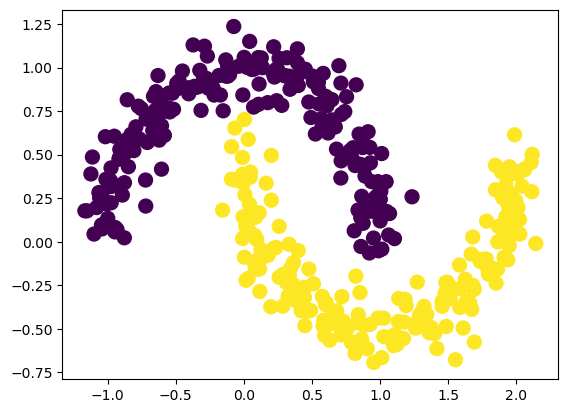

In [10]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as  plt
X, y=make_moons(n_samples=400, noise=0.1, random_state=0)
plt.scatter(X[:,0],X[:,1],marker='o', c=y, s=100)

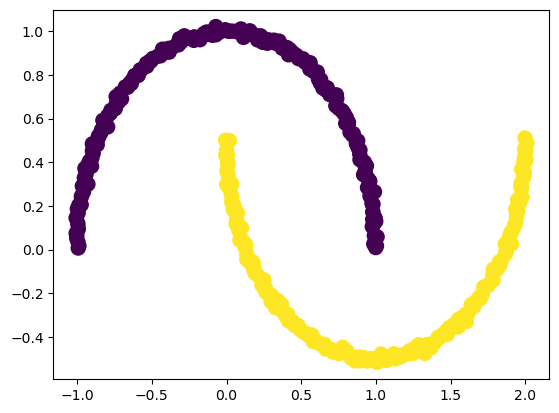

In [11]:
X, y=make_moons(n_samples=400, noise=0.01, random_state=0)
plt.scatter(X[:,0],X[:,1],marker='o', c=y, s=100)

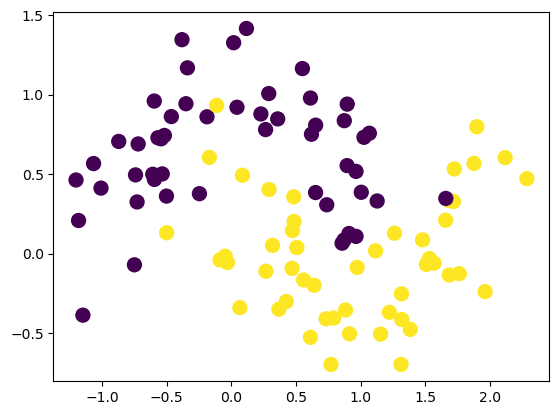

In [12]:
#noise 표준편차
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
plt.scatter(X[:,0],X[:,1],marker='o', c=y, s=100)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

# test_size default=0.25

In [14]:
from sklearn.tree import DecisionTreeClassifier
# criterion(entropy,gini)
model = DecisionTreeClassifier(random_state=2,max_depth=3,criterion='entropy')
# max_depth: 가지치기(과적합 방지)                           criterion: 혼잡도
#                                                         gini: 0~0.5 / entropy: 0~1
model.fit(X_train, y_train)
print("학습용:",model.score(X_train, y_train))
print("검증용:",model.score(X_test, y_test))

학습용: 0.9066666666666666
검증용: 0.92


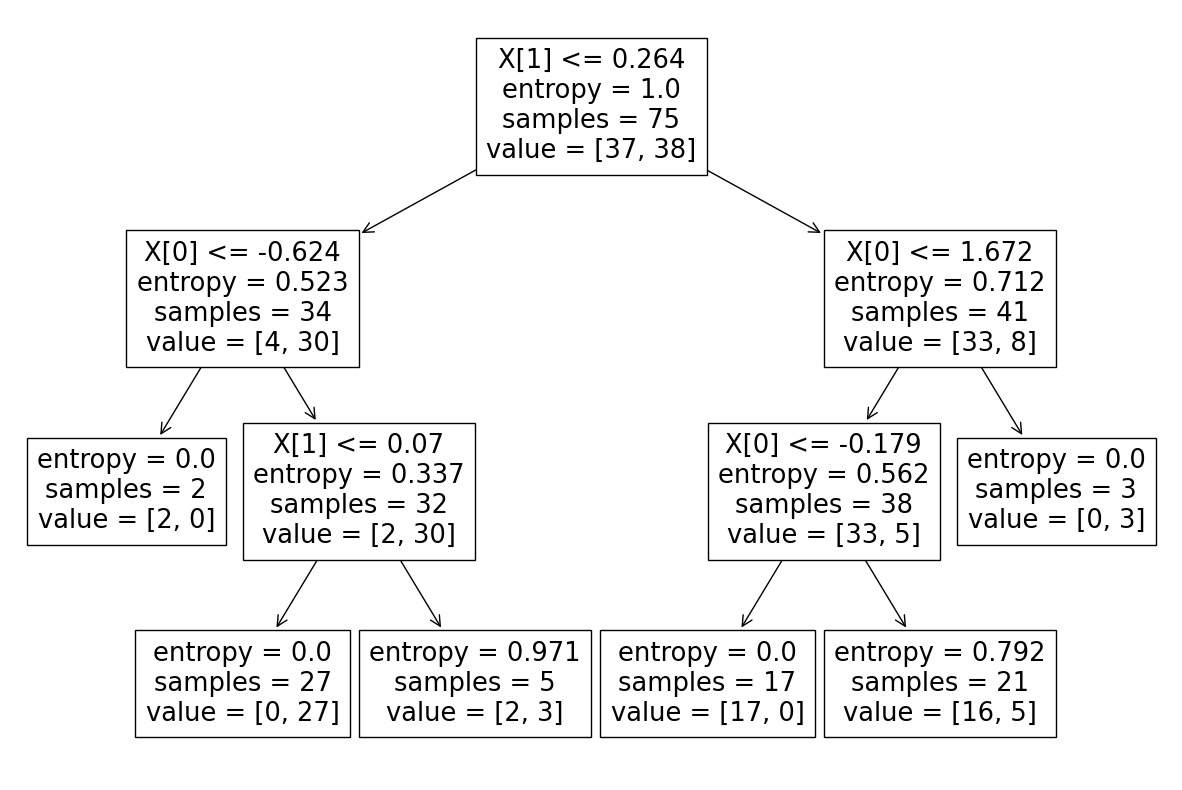

In [15]:
%matplotlib inline
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
tree.plot_tree(model)
plt.show()

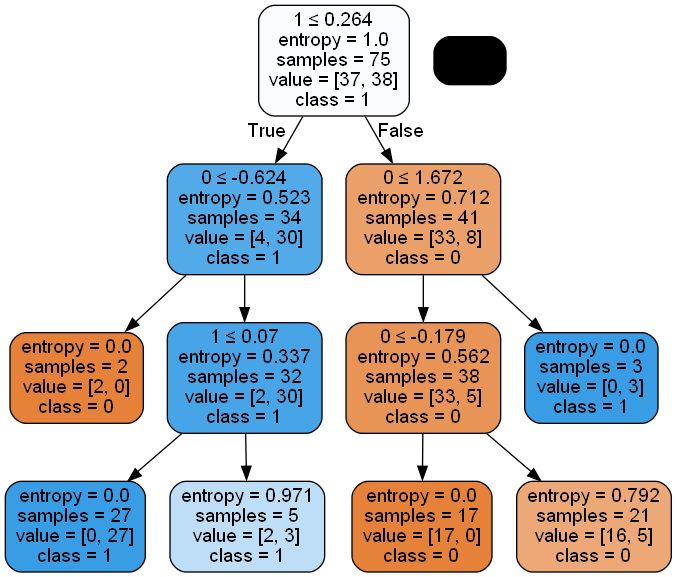

In [16]:
# graphviz exe 설치(path 추가 옵션 선택)
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from IPython.display import Image
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
dot_data = export_graphviz(model, out_file=None, feature_names=[0,1],
class_names=['0','1'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

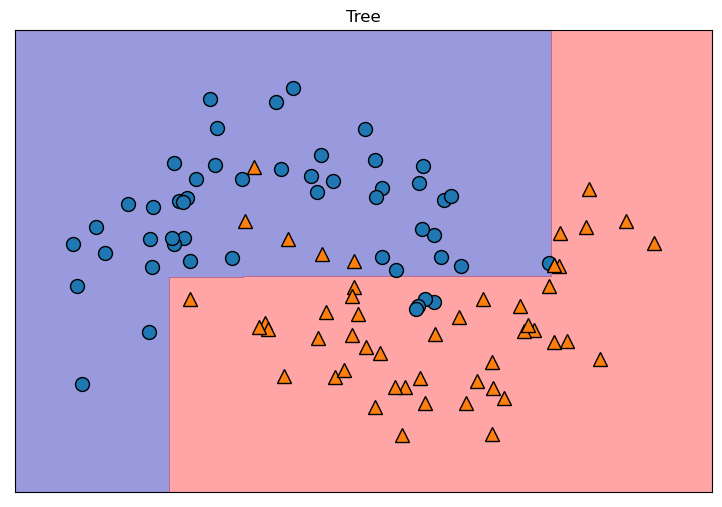

In [17]:
import matplotlib.pyplot as plt
import mglearn
plt.figure(figsize=(9,6))
plt.title("Tree")
#클래스 구분면
mglearn.plots.plot_2d_separator(model, X, fill=True, alpha=0.4)
#산점도
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)